In [1]:
 import pandas as pd
df=pd.read_csv('Strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,233.008420
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,205.245454
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,107.460932
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,173.376126
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,175.038492


In [2]:
# prompt: generate a count variable randomly and attach to df

import numpy as np

df['count_y'] = np.random.randint(0, 10, size=len(df))
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_2,count_y
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,233.008420,5
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,205.245454,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,107.460932,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,173.376126,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,175.038492,1


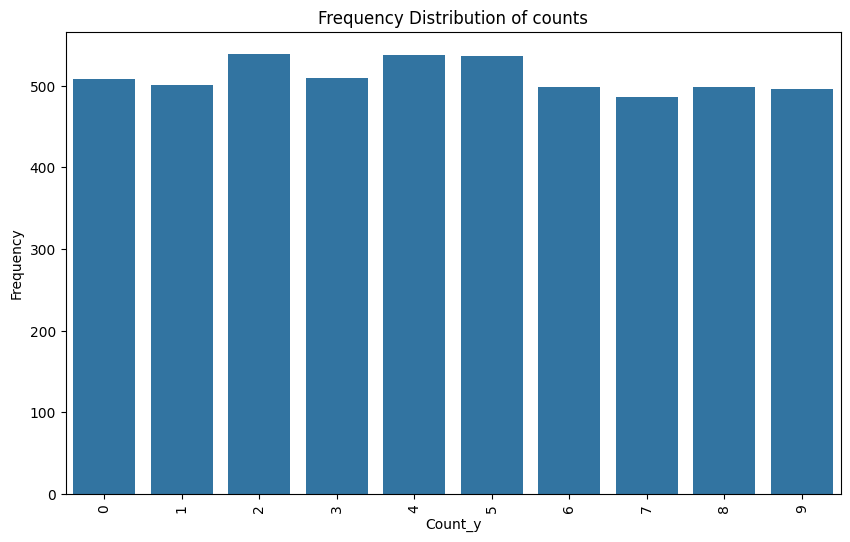

In [3]:
# prompt: Freq distribution counts bar plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='count_y')
plt.title('Frequency Distribution of counts')
plt.xlabel('Count_y')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# prompt: Assumptions of Poisson model

# The dependent variable(s) must be counts or non-negative integers.
# The events must be independent.

#The average rate of events per unit of time or space is constant.

#The probability of an event occurring in a small interval of time or space is proportional to the length of the interval.
# The probability of more than one event occurring in a small interval of time or space is negligible.

In [4]:
X = df[['age', 'hypertension', 	'heart_disease']]

In [5]:
# prompt: run a poisson of cigperday on X
import statsmodels.api as sm
# Define the dependent variable
y = df['count_y']
# Add a constant to the independent variables
X = sm.add_constant(X)
# Create and fit the Poisson regression model
poisson_model = sm.Poisson(y, X)
poisson_results = poisson_model.fit()
# Print the model summary
print(poisson_results.summary())

Optimization terminated successfully.
         Current function value: 2.610772
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:                count_y   No. Observations:                 5110
Model:                        Poisson   Df Residuals:                     5106
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               0.0004005
Time:                        23:20:54   Log-Likelihood:                -13341.
converged:                       True   LL-Null:                       -13346.
Covariance Type:            nonrobust   LLR p-value:                   0.01352
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4592      0.015    100.010      0.000       1.431       1.488
age               0.

In [ ]:
# prompt: check model assumptions

import matplotlib.pyplot as plt
# Check for overdispersion (variance > mean)
mean_count = y.mean()
variance_count = y.var()
print(f"Mean of y: {mean_count}")
print(f"Variance of y: {variance_count}")

# Note: The  overdispersionis a common issue
# with Poisson regression if the assumptions are violated.
# Other assumptions (independence of events, constant rate, etc.) are harder to test
# directly with simple statistical tests and often require domain knowledge
# or more complex statistical methods.
